*Difficulty level -  Easy*

Dataset: You are provided with a dataset named "sales_data.csv," which contains information about sales transactions. The dataset includes columns such as "Date," "Product," "Quantity," "Price," and "Customer."

Include comments and explanations in your code to make it clear and understandable.
Provide appropriate titles and labels for your plots

Tasks:
1 Load the dataset using Pandas and display the first few rows to understand its structure.
2 Perform data cleaning:
    •	Check for missing values and decide on a strategy to handle them.
    •	Identify and remove any duplicate rows.
3 Compute and display the following summary statistics:
    •	Mean, median, and standard deviation of the "Quantity" and "Price" columns.
    •	Total sales revenue (computed as the sum of Quantity * Price).
4 Visualize the data:
    •	Create a histogram of the "Quantity" column to understand the distribution of sales quantities.
    •	Generate a scatter plot of "Price" vs. "Quantity" to explore any potential relationships.
5 Perform categorical analysis:
    •	Group the data by "Product" and compute the total quantity sold and average price for each product.
    •	Visualize the product-wise sales using a bar chart.
6 Identify outliers:
    •	Use the z-score method to detect potential outliers in the "Price" column.
    •	Visualize the outliers using a box plot.
7 Additional Analysis:
    •	Calculate the weekly sales by aggregating the data based on the "Date" column.
    •	Visualize the weekly sales trend over time using a line plot.


In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Load the dataset
sales_data = pd.read_csv(r'C:/Users/SV488YV/OneDrive - EY/Desktop/Learning/Python/Week_5/sales_data.csv')
sales_data

,Order ID,Product,Quantity,Price,Order Date,Customer
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18284,194090,Google Phone,1,600.00,04-08-2019 17:11,"177 Jackson St, Los Angeles, CA 90001"
18285,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18286,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18287,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [ ]:
#Task 2 Perform data cleaning: • Check for missing values and decide on a strategy to handle them. 
#• Identify and remove any duplicate rows.

In [244]:
sales_data.head()

,Order ID,Product,Quantity,Price,Order Date,Customer
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [245]:
sales_data.tail()

,Order ID,Product,Quantity,Price,Order Date,Customer
18284,194090,Google Phone,1,600.00,04-08-2019 17:11,"177 Jackson St, Los Angeles, CA 90001"
18285,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18286,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18287,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"
18288,194094,Lightning Charging Cable,1,14.95,04/18/19 11:08,"354 North St, Boston, MA 02215"


In [246]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18289 entries, 0 to 18288
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order ID    18289 non-null  int64  
 1   Product     18289 non-null  object 
 2   Quantity    18289 non-null  int64  
 3   Price       18289 non-null  float64
 4   Order Date  18289 non-null  object 
 5   Customer    18289 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 857.4+ KB


In [247]:
sales_data.isnull().sum()

Order ID      0
Product       0
Quantity      0
Price         0
Order Date    0
Customer      0
dtype: int64

In [248]:
sales_data.nunique()

Order ID      17537
Product          19
Quantity          7
Price            17
Order Date    13583
Customer      17119
dtype: int64

In [249]:
sales_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18284    False
18285    False
18286    False
18287    False
18288    False
Length: 18289, dtype: bool

In [250]:
sales_data[sales_data.duplicated()]

,Order ID,Product,Quantity,Price,Order Date,Customer
30,176585,Bose SoundSport Headphones,1,99.99,04-07-2019 11:31,"823 Highland St, Boston, MA 02215"
1296,177795,Apple Airpods Headphones,1,150.00,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1675,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
3786,180207,Apple Airpods Headphones,1,150.00,04/13/19 01:46,"196 7th St, Los Angeles, CA 90001"
4176,180576,Lightning Charging Cable,1,14.95,04/18/19 17:23,"431 Park St, Dallas, TX 75001"
4355,180746,AAA Batteries (4-pack),1,2.99,04/30/19 12:05,"398 West St, New York City, NY 10001"
4429,180817,Lightning Charging Cable,1,14.95,04/13/19 18:33,"563 13th St, Los Angeles, CA 90001"
4711,181084,Flatscreen TV,1,300.00,04-07-2019 21:36,"1 Walnut St, Boston, MA 02215"
4882,181246,Wired Headphones,1,11.99,04-09-2019 13:58,"342 Hickory St, San Francisco, CA 94016"
5746,182077,AAA Batteries (4-pack),1,2.99,04/13/19 22:08,"730 4th St, New York City, NY 10001"


In [251]:
sales_data[sales_data['Order ID'].isin([176585])]    # Lets see some example of row duplicates

,Order ID,Product,Quantity,Price,Order Date,Customer
29,176585,Bose SoundSport Headphones,1,99.99,04-07-2019 11:31,"823 Highland St, Boston, MA 02215"
30,176585,Bose SoundSport Headphones,1,99.99,04-07-2019 11:31,"823 Highland St, Boston, MA 02215"


In [252]:
sales_data.drop_duplicates(inplace = True)
sales_data

,Order ID,Product,Quantity,Price,Order Date,Customer
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18284,194090,Google Phone,1,600.00,04-08-2019 17:11,"177 Jackson St, Los Angeles, CA 90001"
18285,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18286,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18287,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [253]:
sales_data[sales_data.duplicated()]

,Order ID,Product,Quantity,Price,Order Date,Customer


In [254]:
sales_data[sales_data['Order ID'].duplicated()]                 # Order ID should be unique

,Order ID,Product,Quantity,Price,Order Date,Customer
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
18,176574,USB-C Charging Cable,1,11.95,04-03-2019 19:42,"20 Hill St, Los Angeles, CA 90001"
32,176586,Google Phone,1,600.00,04-10-2019 17:00,"365 Center St, San Francisco, CA 94016"
119,176672,USB-C Charging Cable,1,11.95,04-12-2019 11:07,"778 Maple St, New York City, NY 10001"
129,176681,ThinkPad Laptop,1,999.99,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101"
...,...,...,...,...,...,...
18198,194008,Wired Headphones,1,11.99,04-12-2019 18:09,"425 Elm St, San Francisco, CA 94016"
18212,194021,Wired Headphones,1,11.99,04/29/19 14:50,"203 Washington St, Boston, MA 02215"
18242,194050,USB-C Charging Cable,1,11.95,04/27/19 00:27,"997 9th St, San Francisco, CA 94016"
18249,194056,Lightning Charging Cable,1,14.95,04-10-2019 10:05,"280 7th St, San Francisco, CA 94016"


In [255]:
sales_data[sales_data['Order ID'] .isin ([176560])]

,Order ID,Product,Quantity,Price,Order Date,Customer
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [256]:
sales_data.drop_duplicates(subset = ['Order ID'] , inplace = True)
sales_data

,Order ID,Product,Quantity,Price,Order Date,Customer
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
...,...,...,...,...,...,...
18284,194090,Google Phone,1,600.00,04-08-2019 17:11,"177 Jackson St, Los Angeles, CA 90001"
18285,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18286,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18287,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [ ]:
# Task3 Compute and display the following summary statistics: 
#• Mean, median, and standard deviation of the "Quantity" and "Price" columns.
#• Total sales revenue (computed as the sum of Quantity * Price)

In [258]:
summary = sales_data[['Quantity','Price']].describe()
summary

,Quantity,Price
count,17537.000000,17537.000000
mean,1.126247,187.727337
std,0.440098,333.286981
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,7.000000,1700.000000


In [259]:
mean_price = summary.loc['mean', 'Price']
median_price = summary.loc['50%', 'Price']
std_dev_price = summary.loc['std', 'Price']

mean_Quantity = summary.loc['mean', 'Quantity']
median_Quantity = summary.loc['50%', 'Quantity']
std_dev_Quantity = summary.loc['std', 'Quantity']

print(f"Mean price: {mean_price}")
print(f"Median price: {median_price}")
print(f"Standard Deviation price: {std_dev_price}")

print(f"Mean Quantity: {mean_Quantity}")
print(f"Median Quantity: {median_Quantity}")
print(f"Standard Deviation Quantity: {std_dev_Quantity}")

Mean price: 187.72733705878997
Median price: 14.95
Standard Deviation price: 333.28698077553304
Mean Quantity: 1.126247362718823
Median Quantity: 1.0
Standard Deviation Quantity: 0.4400984059496803


In [260]:
sales_data['t_Revenue'] = sales_data['Quantity']*sales_data['Price']
sales_data

,Order ID,Product,Quantity,Price,Order Date,Customer,t_Revenue
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",11.95
...,...,...,...,...,...,...,...
18284,194090,Google Phone,1,600.00,04-08-2019 17:11,"177 Jackson St, Los Angeles, CA 90001",600.00
18285,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",3.84
18286,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",5.98
18287,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",3.84


In [261]:
sales_data['t_Revenue'].sum()

3314504.4099999997

In [262]:
round(np.sum(np.array(sales_data['t_Revenue'])),2)

3314504.41

In [ ]:
# Task 4 Visualize the data: • Create a histogram of the "Quantity" column to understand the distribution of sales quantities.
#• Generate a scatter plot of "Price" vs. "Quantity" to explore any potential relationships.

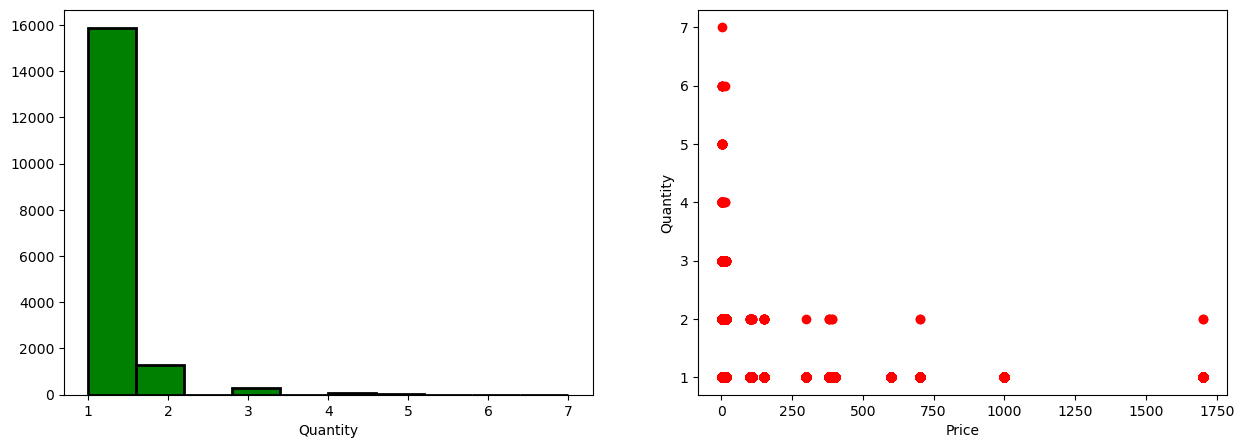

In [263]:
fig,ax = plt.subplots(1,2, figsize = (15,5))
ax[0].hist(sales_data['Quantity'], color = 'green', edgecolor = 'black', lw = 2)
ax[0].set_xlabel('Quantity')

ax[1].scatter(sales_data['Price'],sales_data['Quantity'],color = 'red' )
ax[1].set_xlabel('Price')
ax[1].set_ylabel('Quantity')

plt.plot();

In [ ]:
# Task 5 Perform categorical analysis: • Group the data by "Product" and compute the total quantity sold and average price
#for each product. • Visualize the product-wise sales using a bar chart.

In [264]:
sales_data

,Order ID,Product,Quantity,Price,Order Date,Customer,t_Revenue
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",11.95
...,...,...,...,...,...,...,...
18284,194090,Google Phone,1,600.00,04-08-2019 17:11,"177 Jackson St, Los Angeles, CA 90001",600.00
18285,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",3.84
18286,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",5.98
18287,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",3.84


In [265]:
sales_data1 = sales_data.groupby('Product')[['Quantity','Price']].agg(['sum','mean'])
sales_data1

Quantity                Price         
                                sum      mean        sum     mean
Product                                                          
20in Monitor                    389  1.013021   42236.16   109.99
27in 4K Gaming Monitor          554  1.003623  215274.48   389.99
27in FHD Monitor                718  1.004196  107242.85   149.99
34in Ultrawide Monitor          640  1.004710  242053.63   379.99
AA Batteries (4-pack)          2765  1.366782    7768.32     3.84
AAA Batteries (4-pack)         2879  1.478685    5821.53     2.99
Apple Airpods Headphones       1464  1.006186  218250.00   150.00
Bose SoundSport Headphones     1230  1.006547  122187.78    99.99
Flatscreen TV                   451  1.002222  135000.00   300.00
Google Phone                    570  1.000000  342000.00   600.00
LG Dryer                         76  1.000000   45600.00   600.00
LG Washing Machine               61  1.000000   36600.00   600.00
Lightning Charging Cable       2222  1.078117   30811.95    14.95
Macbook Pro Laptop              444  1.004525  751400.00  1700.00
ThinkPad Laptop                 381  1.000000  380996.19   999.99
USB-C Charging Cable           2078  1.094260   22693.05    11.95
Vareebadd Phone                 214  1.000000   85600.00   400.00
Wired Headphones               1928  1.093590   21138.37    11.99
iPhone                          687  1.002920  479500.00   700.00

In [266]:
product_sales = sales_data1['Quantity']['sum']
product_sales

Product
20in Monitor                   389
27in 4K Gaming Monitor         554
27in FHD Monitor               718
34in Ultrawide Monitor         640
AA Batteries (4-pack)         2765
AAA Batteries (4-pack)        2879
Apple Airpods Headphones      1464
Bose SoundSport Headphones    1230
Flatscreen TV                  451
Google Phone                   570
LG Dryer                        76
LG Washing Machine              61
Lightning Charging Cable      2222
Macbook Pro Laptop             444
ThinkPad Laptop                381
USB-C Charging Cable          2078
Vareebadd Phone                214
Wired Headphones              1928
iPhone                         687
Name: sum, dtype: int64

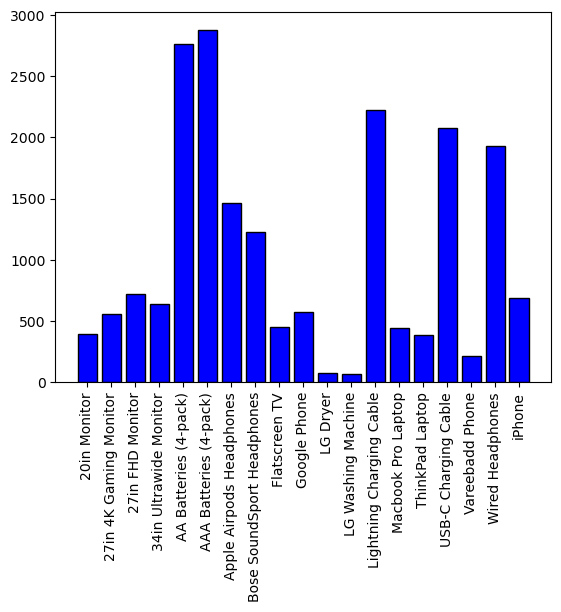

In [267]:
fig, ax = plt.subplots()
ax.bar(product_sales.index,product_sales.values, color = 'blue', edgecolor = 'black')
ax.tick_params(axis = 'x',labelrotation=90)

In [ ]:
# Task6 Identify outliers: • Use the z-score method to detect potential outliers in the "Price" column.
#• Visualize the outliers using a box plot.

In [268]:
sales_data['z_scores'] = (sales_data['Price'] - sales_data['Price'].mean())/ sales_data['Price'].std()
sales_data

,Order ID,Product,Quantity,Price,Order Date,Customer,t_Revenue,z_scores
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,-0.527405
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99,-0.263249
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,1.236990
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,-0.527285
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",11.95,-0.527405
...,...,...,...,...,...,...,...,...
18284,194090,Google Phone,1,600.00,04-08-2019 17:11,"177 Jackson St, Los Angeles, CA 90001",600.00,1.236990
18285,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",3.84,-0.551739
18286,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",5.98,-0.554289
18287,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",3.84,-0.551739


In [269]:
sales_data[sales_data['z_scores'] > 3] 

,Order ID,Product,Quantity,Price,Order Date,Customer,t_Revenue,z_scores
8,176565,Macbook Pro Laptop,1,1700.0,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",1700.0,4.537449
85,176639,Macbook Pro Laptop,1,1700.0,04/28/19 16:14,"853 Cedar St, San Francisco, CA 94016",1700.0,4.537449
89,176643,Macbook Pro Laptop,1,1700.0,04/27/19 21:32,"373 Adams St, Boston, MA 02215",1700.0,4.537449
92,176646,Macbook Pro Laptop,1,1700.0,04/22/19 07:14,"657 Adams St, Portland, OR 97035",1700.0,4.537449
135,176687,Macbook Pro Laptop,1,1700.0,04/30/19 10:26,"121 Wilson St, Los Angeles, CA 90001",1700.0,4.537449
...,...,...,...,...,...,...,...,...
18017,193839,Macbook Pro Laptop,1,1700.0,04-05-2019 14:46,"984 Sunset St, San Francisco, CA 94016",1700.0,4.537449
18067,193885,Macbook Pro Laptop,1,1700.0,04/16/19 08:47,"837 6th St, Austin, TX 73301",1700.0,4.537449
18079,193897,Macbook Pro Laptop,1,1700.0,04/16/19 19:19,"489 Chestnut St, Los Angeles, CA 90001",1700.0,4.537449
18160,193972,Macbook Pro Laptop,1,1700.0,04-11-2019 16:23,"334 5th St, San Francisco, CA 94016",1700.0,4.537449


In [270]:
sales_data[sales_data['z_scores'] < -3] 

,Order ID,Product,Quantity,Price,Order Date,Customer,t_Revenue,z_scores


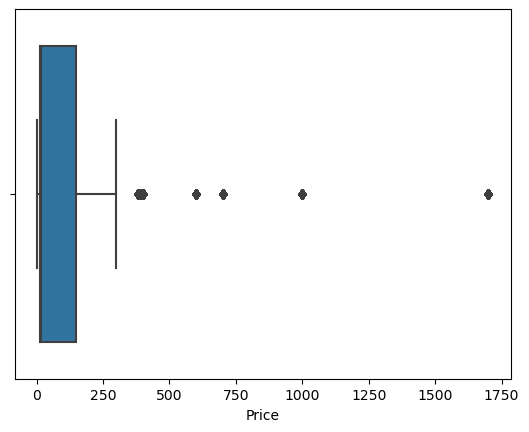

In [271]:
sns.boxplot(x= sales_data['Price'] )
plt.plot();

In [ ]:
#Task7 Additional Analysis: • Calculate the weekly sales by aggregating the data based on the "Date" column. 
#• Visualize the weekly sales trend over time using a line plot.

In [272]:
sales_data["Order Date"] = pd.to_datetime(sales_data["Order Date"])
sales_data

,Order ID,Product,Quantity,Price,Order Date,Customer,t_Revenue,z_scores
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,-0.527405
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,-0.263249
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,1.236990
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,-0.527285
5,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",11.95,-0.527405
...,...,...,...,...,...,...,...,...
18284,194090,Google Phone,1,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",600.00,1.236990
18285,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",3.84,-0.551739
18286,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",5.98,-0.554289
18287,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",3.84,-0.551739


In [273]:
sales_data2 = sales_data.set_index("Order Date")
sales_data3 = sales_data2[['t_Revenue']]
weekly_sales = sales_data3.resample("W").sum()

In [274]:
weekly_sales1 = weekly_sales['t_Revenue']
weekly_sales1

Order Date
2019-04-07    752122.43
2019-04-14    740969.83
2019-04-21    776323.81
2019-04-28    796981.97
2019-05-05    248106.37
Freq: W-SUN, Name: t_Revenue, dtype: float64

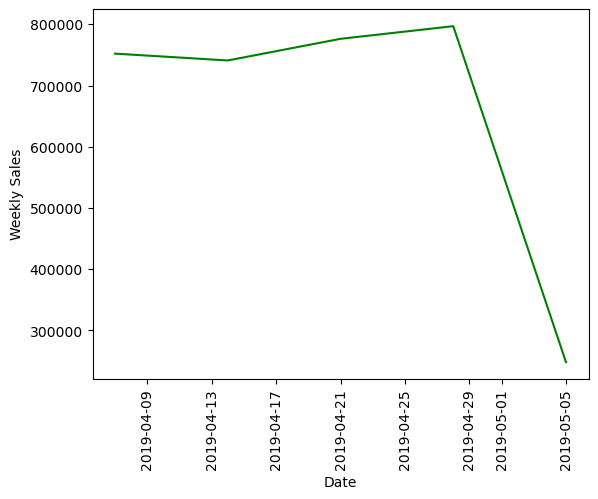

In [275]:
fig,ax = plt.subplots()
ax.plot(weekly_sales1.index, weekly_sales1.values, color = 'green')
ax.tick_params(axis = 'x',labelrotation=90)
ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')
ax.plot();

*Difficulty level - Medium*
Analyse the given dataset and come up with an analysis using different metrics and plots to answer the questions below:

After each question intsert a code to justify your answer and also write down the answer in the text box itself.



In [276]:
smSales = pd.read_csv(r'C:/Users/SV488YV/OneDrive - EY/Desktop/Learning/Python/Week_5/supermarket_sales.csv')
smSales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


Q1: What does the customer rating look like and is it skewed?

Answer - There is no skewness in the customer rating column as skewness value is coming close to zero. Also my plotting the histogram of customer rating it tells that the graph is not right skewed or left skewed.

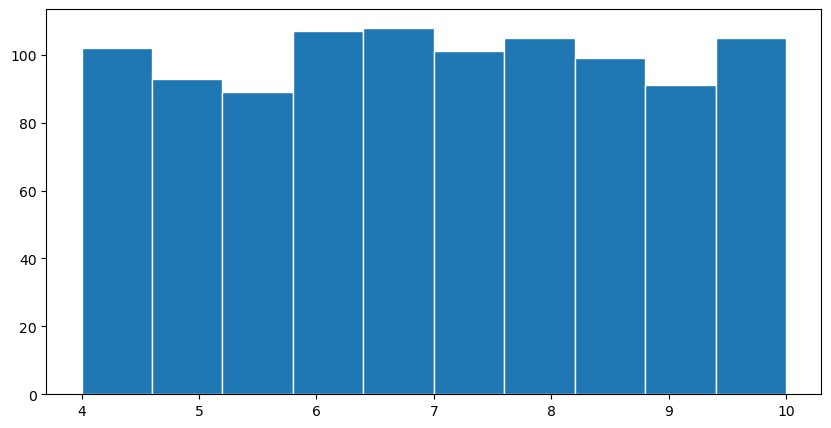

In [277]:
smSales[['Rating']]
fig, ax = plt.subplots(figsize = (10,5))
ax.hist(smSales[['Rating']], edgecolor = 'white', )
plt.plot();

In [278]:
smSales[['Rating']].skew()

Rating    0.00901
dtype: float64

Q2: Is there any difference in aggregate sales across branches?

A- Yes the total sales of the Branch C is highest among all the branches.

In [279]:
smSales.groupby('Branch')[['Total']].agg(['sum'])

,Total
,sum
Branch,
A,106200.3705
B,106197.6720
C,110568.7065


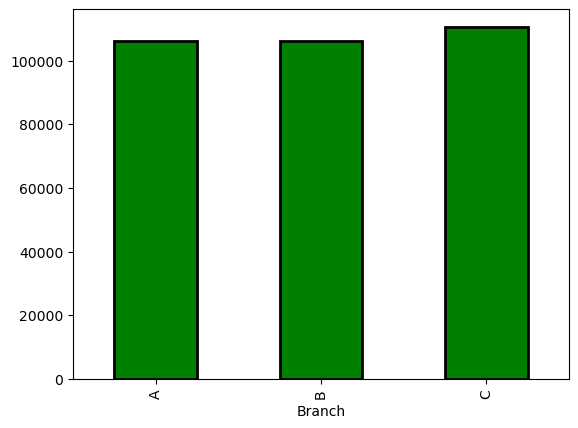

In [280]:
smSales.groupby('Branch')['Total'].sum().plot.bar( fontsize= 10 , color = 'green', edgecolor = 'black', lw = 2)
plt.plot();

Question 3: Which is the most pouplar payment method used by customers?

A- E wallet is the most popular method.

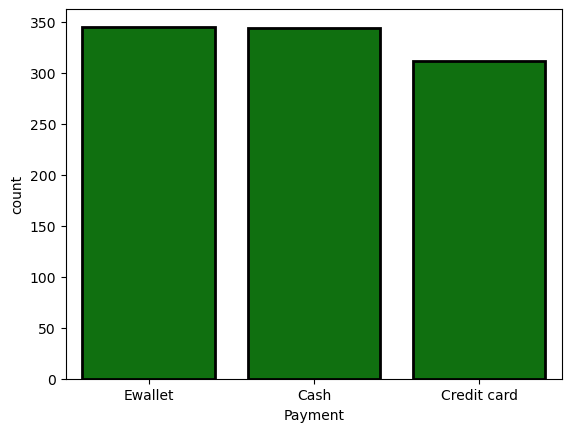

In [281]:
sns.countplot( x = 'Payment', data = smSales, color = 'green', edgecolor = 'black', lw = 2, order = smSales['Payment'].value_counts().index);

In [282]:
smSales['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

Q4: Does gross income affect the ratings that the customers provide?

A- From the scatter plot we can infer that the raings are not being affected by gross income. As across all the income groups we can find all kind of ratings being given from 4 to 10. 

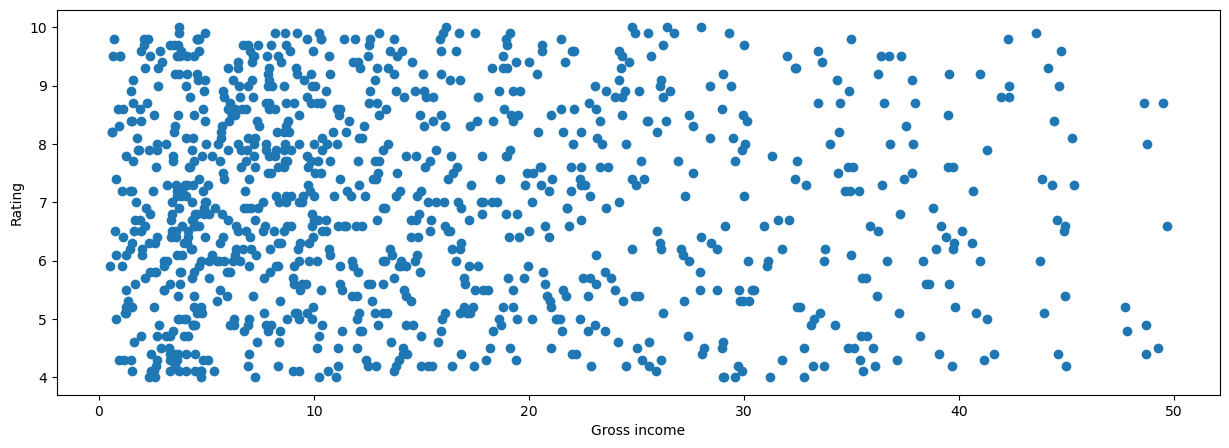

In [284]:
fig,ax = plt.subplots( figsize = (15,5))
ax.scatter(smSales['gross income'],smSales['Rating'])
ax.set_xlabel("Gross income")
ax.set_ylabel("Rating")
plt.show();

Q5: Which branch is the most profitable?

A- Branch C is the most profitable as its gross is highest 5265.17 among all the branches

In [285]:
smSales.groupby('Branch')[['gross income']].agg(['sum'])

,gross income
,sum
Branch,
A,5057.1605
B,5057.0320
C,5265.1765


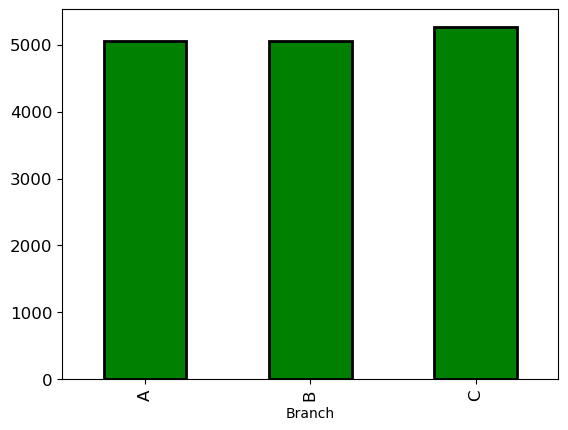

In [286]:
smSales.groupby('Branch')['gross income'].sum().plot.bar( fontsize=12, color = 'green', edgecolor = 'black', lw = 2)
plt.show();

Q6: Is there any time trend in gross income?

A- No there is no time trend in gross income.As gross income does not follow any particular pattern in gross income.

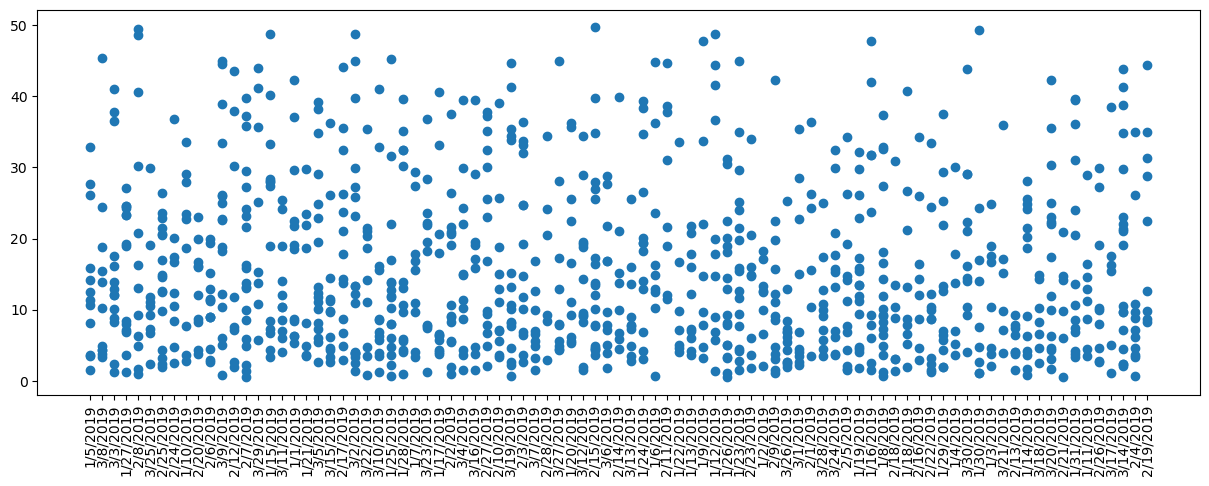

In [287]:
fig,ax = plt.subplots(figsize = (15,5))
ax.scatter(smSales['Date'], smSales['gross income'])
ax.tick_params(axis = 'x',labelrotation=90)
plt.plot();

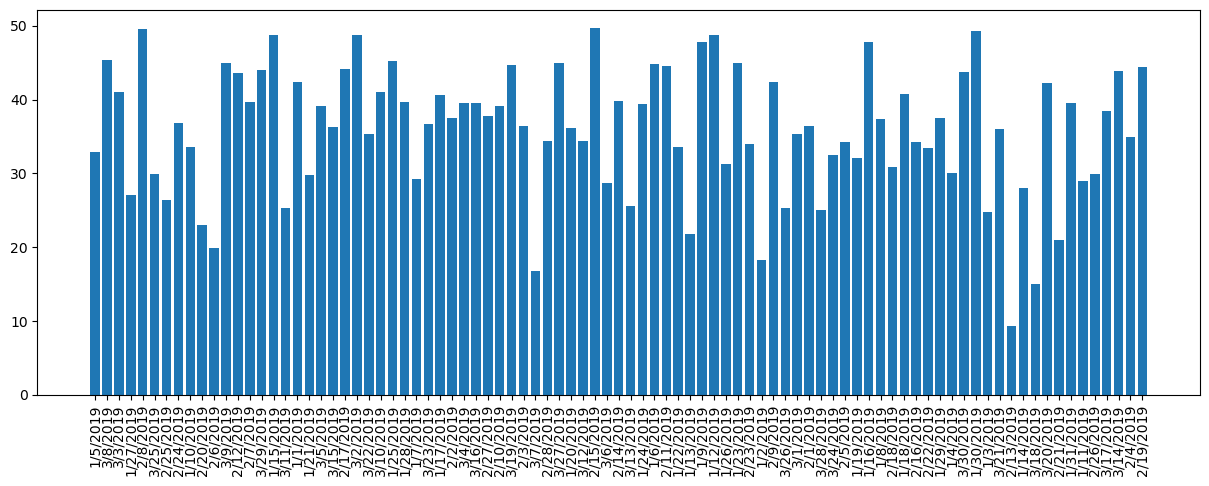

In [288]:
fig,ax = plt.subplots(figsize = (15,5))
ax.bar(smSales['Date'], smSales['gross income'])
ax.tick_params(axis = 'x',labelrotation=90)
plt.plot();

Q7: Which product line generates most income?

A- Food and beverages generates the most income

In [235]:
smSales1 = smSales[['Product line','Unit price','Quantity']]
smSales1['t_sales'] = smSales['Unit price']*smSales['Quantity']
smSales1

C:\Users\SV488YV\AppData\Local\Temp\ipykernel_103972\1196760347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smSales1['t_sales'] = smSales['Unit price']*smSales['Quantity']


,Product line,Unit price,Quantity,t_sales
0,Health and beauty,74.69,7,522.83
1,Electronic accessories,15.28,5,76.40
2,Home and lifestyle,46.33,7,324.31
3,Health and beauty,58.22,8,465.76
4,Sports and travel,86.31,7,604.17
...,...,...,...,...
995,Health and beauty,40.35,1,40.35
996,Home and lifestyle,97.38,10,973.80
997,Food and beverages,31.84,1,31.84
998,Home and lifestyle,65.82,1,65.82


In [236]:
smSales1.groupby('Product line')['t_sales'].sum()

Product line
Electronic accessories    51750.03
Fashion accessories       51719.90
Food and beverages        53471.28
Health and beauty         46851.18
Home and lifestyle        51297.06
Sports and travel         52497.93
Name: t_sales, dtype: float64

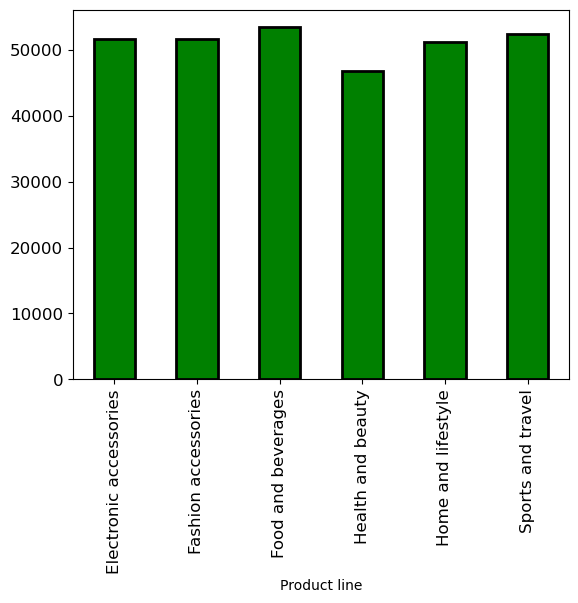

In [239]:
smSales1.groupby('Product line')['t_sales'].sum().plot.bar( fontsize=12, color = 'green', edgecolor = 'black', lw = 2)
plt.show();

Q8: Show the correlation between all variable.

C:\Users\SV488YV\AppData\Local\Temp\ipykernel_103972\3667724736.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(smSales.drop(['gross margin percentage'],axis=1).corr(), annot = True, vmin = -1, vmax = 1, cmap='viridis')


<Axes: >

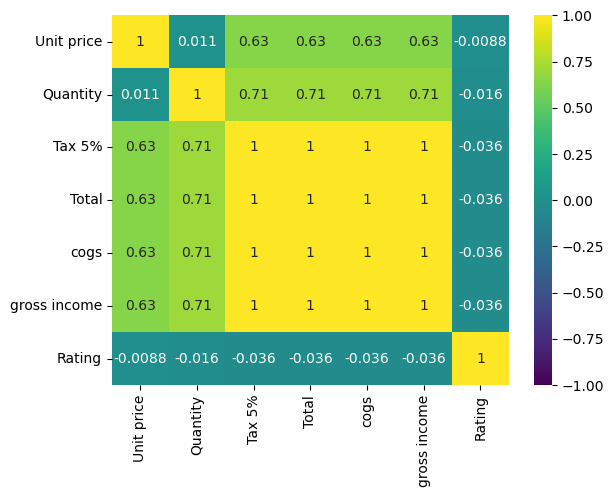

In [290]:
sns.heatmap(smSales.drop(['gross margin percentage'],axis=1).corr(), annot = True, vmin = -1, vmax = 1, cmap='viridis')

In [291]:
smSales.drop(['gross margin percentage'],axis=1).corr()

C:\Users\SV488YV\AppData\Local\Temp\ipykernel_103972\376808993.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  smSales.drop(['gross margin percentage'],axis=1).corr()


,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000
